In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

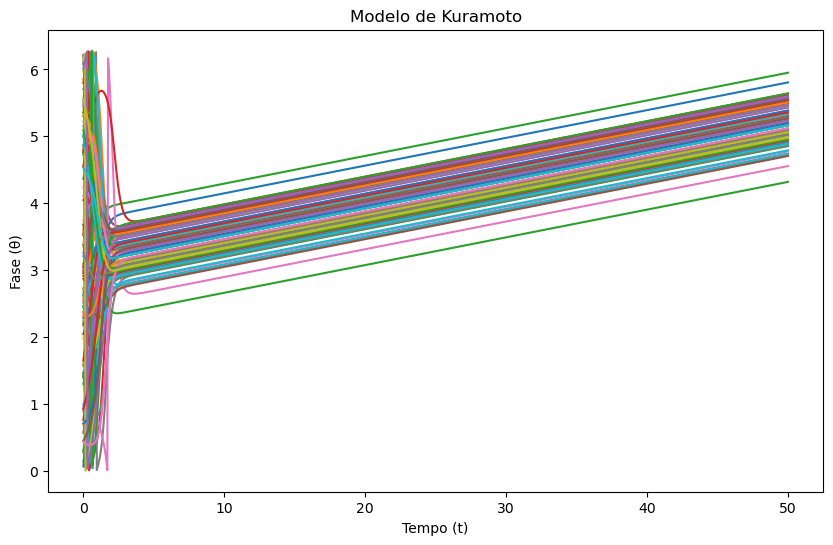

In [2]:
N = 100
K = 4
t_max = 50 
t = np.linspace(0, t_max, 1000)  
teta_0 = np.random.uniform(0, 2 * np.pi, N)
#gamma = 1.0
#omega = gamma * np.random.standard_cauchy(N)
mu, sigma = 0, 1 # mean and standard deviation
omega = np.random.normal(mu, sigma, 1000)


def kuramoto3(teta, t, K, N, omega):
    dteta = np.zeros(N)
    for i in range(N):
        dteta[i] =omega[i] + K/N * np.sum([np.sin(teta - teta[i])])
    return dteta

sol = odeint(kuramoto3, teta_0, t, args=(K, N, omega))
sol_2 = sol % (2 * np.pi)

plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(t, sol_2[:, i])

plt.xlabel('Tempo (t)')
plt.ylabel('Fase (θ)')
plt.title(f'Modelo de Kuramoto')
plt.show()